# Libraries and Fonts

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML and XML
from urllib.request import urlopen  # For opening URLs
import matplotlib.pyplot as plt  # For creating plots and visualizations
from matplotlib.colors import LinearSegmentedColormap  # For custom colormaps
from matplotlib.patches import Rectangle  # For drawing rectangles in plots
from matplotlib import font_manager  # For Matplotlib's font management
from highlight_text import ax_text  # For custom text annotations in plots
from mplsoccer import PyPizza, Pitch, VerticalPitch, FontManager, Sbopen  # For Football visualizations
import os # Import os module for file and directory operations

In [2]:
import os # Import os module for file and directory operations
import requests  # For making HTTP requests
from matplotlib import font_manager  # For Matplotlib's font management
import matplotlib.pyplot as plt  # For creating plots and visualizations

font_dir = './fonts'  # Adjust this path as needed
# Ensure the font directory exists or create it if it doesn't
os.makedirs(font_dir, exist_ok=True)

# Weights
weights = ['Black', 'Bold', 'Medium', 'Regular', 'Italic']
# Download and register each font weight
for weight in weights:
    # URL to the font file
    font_url = f'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-{weight}.ttf'

    # Download the font file
    response = requests.get(font_url)
    font_filename = os.path.join(font_dir, f'Roboto-{weight}.ttf')  # Save the font with a local name
    with open(font_filename, 'wb') as f:
        f.write(response.content)

    # Register the font files with Matplotlib
    font_manager.fontManager.addfont(font_filename)

# Refresh Matplotlib's font cache to recognize the newly registered fonts
plt.rcParams['font.family'] = 'Roboto'  # Set the font family for plots

# Statistic Breakdown using Thierry Henry FBRef page

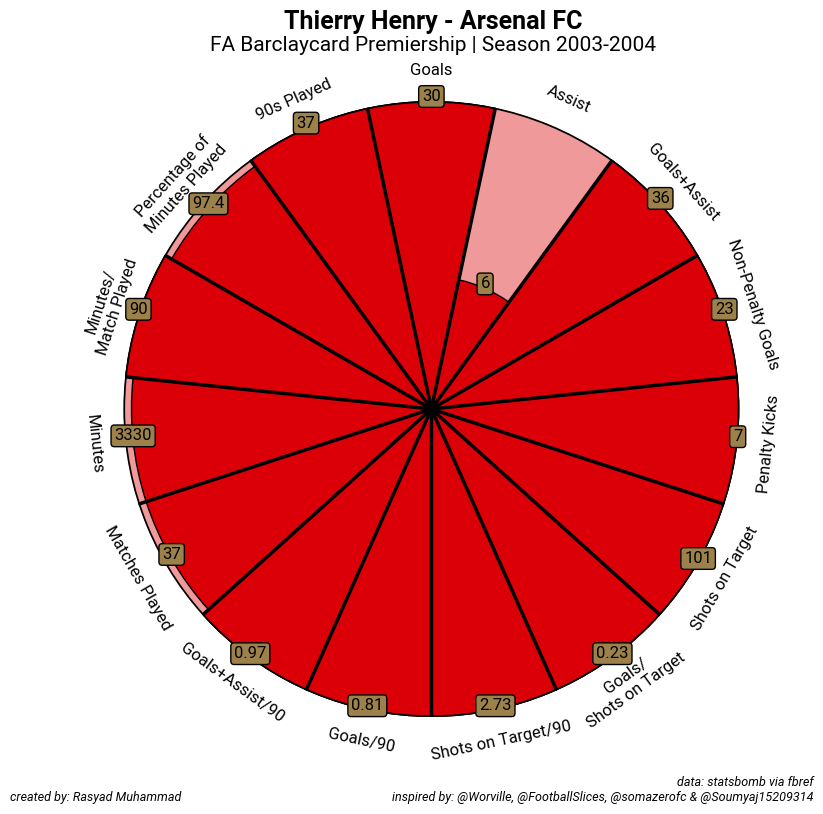

In [3]:
from mplsoccer import PyPizza # For soccer visualizations

# Parameter and value list
params = [
    "Goals", "Assist", "Goals+Assist", "Non-Penalty Goals", "Penalty Kicks", "Shots on Target", "Goals/\nShots on Target", 
    "Shots on Target/90", "Goals/90", "Goals+Assist/90", "Matches Played", "Minutes", "Minutes/\nMatch Played", 
    "Percentage of\nMinutes Played", "90s Played"
]
values = [30, 6, 36, 23, 7, 101, 0.23, 2.73, 0.81, 0.97, 37, 3330, 90, 97.4, 37]

# Minimum range value and maximum range value for parameters
min_range = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
max_range = [30, 14, 36, 23, 7, 101, 0.23, 2.73, 0.81, 0.97, 38, 3420, 90, 100, 37]

# Instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,
    max_range=max_range,
    background_color="#ffffff",
    straight_line_color="#000000",
    last_circle_color="#000000",
    last_circle_lw=2.5,
    straight_line_lw=2.5,
    other_circle_lw=0,
    other_circle_color="#000000",
    inner_circle_size=0,
)

# Plot pizza chart
fig, ax = baker.make_pizza(
    values,
    figsize=(8, 8),
    color_blank_space="same",
    blank_alpha=0.4,
    param_location=110,
    kwargs_slices=dict(
        facecolor="#DB0007",
        edgecolor="#000000",
        zorder=1,
        linewidth=1
    ),
    kwargs_params=dict(
        color="#000000",
        fontsize=12,
        zorder=5,
        va="center"
    ),
    kwargs_values=dict(
        color="#000000",
        fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="#9C824A",
            boxstyle="round,pad=0.2",
            lw=1
        )
    )
)

# Add title
fig.text(
    0.515, 0.97, "Thierry Henry - Arsenal FC", size=18,
    ha="center", fontweight='bold', color="#000000"
)
# Add subtitle
fig.text(
    0.515, 0.942, "FA Barclaycard Premiership | Season 2003-2004",
    size=15,
    ha="center", fontweight='regular', color="#000000"
)
# Add credits
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
CREDIT_3 = "created by: Rasyad Muhammad"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    style='italic', color="#000000",
    ha="right"
)
fig.text(
    0.20, 0.005, f"{CREDIT_3}", size=9,
    style='italic', color="#000000",
    ha="right"
)
# Show the plot
plt.show()


# Analysis with Statsbomb Open Data

- Shot

In [4]:
import pandas as pd  # For data manipulation and analysis
from mplsoccer import Sbopen  # For soccer visualizations

# Set display option to show up to 500 columns in pandas DataFrames
pd.set_option('display.max_columns', 500)
# Instantiate Sbopen parser
parser = Sbopen()
# Retrieve match data for a specific competition and season using Sbopen
# Replace competition_id and season_id with your actual IDs
df_match = parser.match(competition_id=2, season_id=44)

# Display concise summary of DataFrame info, including data types and memory usage
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         38 non-null     int64         
 1   match_date                       38 non-null     datetime64[ns]
 2   kick_off                         38 non-null     datetime64[ns]
 3   home_score                       38 non-null     int64         
 4   away_score                       38 non-null     int64         
 5   match_status                     38 non-null     object        
 6   match_status_360                 38 non-null     object        
 7   last_updated                     38 non-null     datetime64[ns]
 8   last_updated_360                 38 non-null     datetime64[ns]
 9   match_week                       38 non-null     int64         
 10  competition_id                   38 non-null     int64         


In [5]:
# Filter matches where Arsenal is either the home or away team
arsenal_matches = df_match.loc[(df_match['home_team_name'] == 'Arsenal') | (df_match['away_team_name'] == 'Arsenal')]
# Display the shape (number of rows and columns) of the filtered DataFrame
arsenal_matches_shape = arsenal_matches.shape
print("Shape of Arsenal matches DataFrame:", arsenal_matches_shape)

Shape of Arsenal matches DataFrame: (38, 52)


In [6]:
# Filter matches where Arsenal is either the home or away team and reset index
df_match_arsenal = df_match.loc[(df_match['home_team_name'] == 'Arsenal') | (df_match['away_team_name'] == 'Arsenal')].reset_index(drop=True)
# Display the first few rows of the filtered DataFrame
df_match_arsenal.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3749052,2004-02-07,2004-02-07 16:00:00,1,3,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13 16:17:31.694,2,2,England,Premier League,44,2003/2004,46,Wolverhampton Wanderers,male,None,68,England,3602.0,Dave Jones,Dave Jones,1956-08-17,68.0,England,1,Arsenal,male,None,68,England,577.0,Arsène Wenger,Arsène Wenger,1949-10-22,78.0,France,1.1.0,2,2,1,Regular Season,217.0,Molineux Stadium,68.0,England,NaN,NaN,NaN,NaN
1,3749522,2003-12-26,2003-12-26 13:00:00,3,0,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13 16:17:31.694,18,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,577.0,Arsène Wenger,Arsène Wenger,1949-10-22,78.0,France,46,Wolverhampton Wanderers,male,None,68,England,3602.0,Dave Jones,Dave Jones,1956-08-17,68.0,England,1.1.0,2,2,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN
2,3749246,2004-03-28,2004-03-28 17:05:00,1,1,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13 16:17:31.694,30,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,577.0,Arsène Wenger,Arsène Wenger,1949-10-22,78.0,France,39,Manchester United,male,None,68,England,790.0,Alex Ferguson,Alex Ferguson,1941-12-31,201.0,Scotland,1.1.0,2,2,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN
3,3749257,2004-05-15,2004-05-15 16:00:00,2,1,available,scheduled,2020-08-30 08:12:14.579037,2021-06-13 16:17:31.694,38,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,577.0,Arsène Wenger,Arsène Wenger,1949-10-22,78.0,France,22,Leicester City,male,None,68,England,2974.0,Micky Adams,Micky Adams,1961-11-08,68.0,England,1.1.0,2,2,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN
4,3749642,2004-02-28,2004-02-28 16:00:00,2,1,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13 16:17:31.694,27,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,577.0,Arsène Wenger,Arsène Wenger,1949-10-22,78.0,France,75,Charlton Athletic,male,None,68,England,3407.0,Alan Curbishley,Alan Curbishley,1957-11-08,68.0,England,1.1.0,2,2,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN


In [7]:
# Initialize an empty dictionary to store events data for each match
df_matches = {}
# Iterate through each match in df_match_arsenal and fetch events data
for i, match_id in enumerate(df_match_arsenal['match_id']):
    df_matches[match_id] = {}
    # Fetch different types of event data for the current match
    df_matches[match_id]['event'], df_matches[match_id]['related'], df_matches[match_id]['freeze'], df_matches[match_id]['tactic'] = parser.event(match_id)

In [8]:
# Define columns for shot data
shot_cols = ['id', 'period', 'minute', 'match_id', 'x', 'y', 'end_y', 'end_z', 'play_pattern_name',
             'sub_type_name', 'under_pressure', 'body_part_name', 'technique_name',
             'shot_first_time', 'shot_key_pass_id', 'outcome_name', 'shot_statsbomb_xg']

# Initialize an empty list to store shot DataFrames
shot_frames = []
# Iterate through each match involving Arsenal and collect shot data
for match_id in df_match_arsenal['match_id']:
    # Filter shots for a specific player (assuming player_id 15516 is Thierry Henry)
    mask_shot = (df_matches[match_id]['event'].type_name == 'Shot') & (df_matches[match_id]['event'].player_id == 15516)
    shots_temp = df_matches[match_id]['event'].loc[mask_shot, shot_cols]
    # Append shots_temp to the list of shot frames if it's not empty
    if not shots_temp.empty:
        shot_frames.append(shots_temp)

# Concatenate all shot frames into a single DataFrame
df_shot = pd.concat(shot_frames, ignore_index=True)
# Display the collected shot data DataFrame
df_shot.head()


,id,period,minute,match_id,x,y,end_y,end_z,play_pattern_name,sub_type_name,under_pressure,body_part_name,technique_name,shot_first_time,shot_key_pass_id,outcome_name,shot_statsbomb_xg
0,86c1c1ba-71a9-401e-a11e-c43716c2f543,1,12,3749052,107.2,18.1,38.9,2.3,From Throw In,Open Play,NaN,Right Foot,Normal,NaN,428a30a1-5f57-4b04-ab1b-5f0a3e189d36,Saved,0.007914
1,0de7bda3-e2a2-4192-a5e0-5d73eae7ec18,2,57,3749052,106.5,49.2,38.6,0.2,Regular Play,Open Play,1.0,Right Foot,Normal,True,09df02c2-e273-4490-83f4-1be684c3b8c1,Goal,0.316198
2,8c5f124e-e4c5-4c48-bf7d-dda75e3c9932,2,59,3749052,94.5,28.8,38.8,1.2,Regular Play,Open Play,NaN,Right Foot,Normal,NaN,43237b4e-89b2-44a9-86ec-fe04f50451a8,Saved,0.018697
3,203178c3-fd5f-4f86-bb90-c4d089db6fbd,1,3,3749522,107.6,28.7,35.6,2.3,From Throw In,Open Play,NaN,Left Foot,Half Volley,NaN,49a1beec-a2d8-40aa-9eeb-5c85ab811d2f,Saved,0.064198
4,5123758e-5a69-4829-b873-d76d4f485e3b,1,12,3749522,99.3,57.4,39.5,0.3,From Free Kick,Free Kick,NaN,Right Foot,Normal,NaN,NaN,Saved,0.038759


In [9]:
import numpy as np  # For numerical operations

# Function to find opponent team based on match_id
def find_opponent(row):
    match_id = row['match_id']
    home_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'home_team_name'].values[0]
    away_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'away_team_name'].values[0]
    return away_team if home_team == 'Arsenal' else home_team
# Function to determine if Arsenal is playing at home or away based on match_id
def find_home_away(row):
    match_id = row['match_id']
    home_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'home_team_name'].values[0]
    return 'home' if home_team == 'Arsenal' else 'away'

# Apply functions to create new columns in df_shot
df_shot['opponent'] = df_shot.apply(find_opponent, axis=1)
df_shot['home_away'] = df_shot.apply(find_home_away, axis=1)
# Merge additional match information into df_shot
df_shot = pd.merge(df_shot, df_match_arsenal[['match_id', 'match_date', 'match_week']])

# Function to determine shot zone based on end_y and end_z coordinates
def zone(row):
    if row['end_y'] > 36 and row['end_y'] < 44 and row['end_z'] < 2.8:
        if row['end_y'] < 36 + 8 / 3:
            zone_h = 'left'
        elif row['end_y'] >= 36 + 8 / 3 and row['end_y'] < 36 + 2 * 8 / 3:
            zone_h = 'center'
        else:
            zone_h = 'right'

        if row['end_z'] < 2.8 / 2:
            zone_v = 'bottom'
        else:
            zone_v = 'top'
        
        zone = zone_v + ' ' + zone_h
        return zone
    else:
        return np.nan

# Apply zone function to create a new 'zone' column in df_shot
df_shot['zone'] = df_shot.apply(zone, axis=1)
# Display the modified DataFrame
df_shot.head()

,id,period,minute,match_id,x,y,end_y,end_z,play_pattern_name,sub_type_name,under_pressure,body_part_name,technique_name,shot_first_time,shot_key_pass_id,outcome_name,shot_statsbomb_xg,opponent,home_away,match_date,match_week,zone
0,86c1c1ba-71a9-401e-a11e-c43716c2f543,1,12,3749052,107.2,18.1,38.9,2.3,From Throw In,Open Play,NaN,Right Foot,Normal,NaN,428a30a1-5f57-4b04-ab1b-5f0a3e189d36,Saved,0.007914,Wolverhampton Wanderers,away,2004-02-07,2,top center
1,0de7bda3-e2a2-4192-a5e0-5d73eae7ec18,2,57,3749052,106.5,49.2,38.6,0.2,Regular Play,Open Play,1.0,Right Foot,Normal,True,09df02c2-e273-4490-83f4-1be684c3b8c1,Goal,0.316198,Wolverhampton Wanderers,away,2004-02-07,2,bottom left
2,8c5f124e-e4c5-4c48-bf7d-dda75e3c9932,2,59,3749052,94.5,28.8,38.8,1.2,Regular Play,Open Play,NaN,Right Foot,Normal,NaN,43237b4e-89b2-44a9-86ec-fe04f50451a8,Saved,0.018697,Wolverhampton Wanderers,away,2004-02-07,2,bottom center
3,203178c3-fd5f-4f86-bb90-c4d089db6fbd,1,3,3749522,107.6,28.7,35.6,2.3,From Throw In,Open Play,NaN,Left Foot,Half Volley,NaN,49a1beec-a2d8-40aa-9eeb-5c85ab811d2f,Saved,0.064198,Wolverhampton Wanderers,home,2003-12-26,18,NaN
4,5123758e-5a69-4829-b873-d76d4f485e3b,1,12,3749522,99.3,57.4,39.5,0.3,From Free Kick,Free Kick,NaN,Right Foot,Normal,NaN,NaN,Saved,0.038759,Wolverhampton Wanderers,home,2003-12-26,18,bottom center


In [10]:
# Count of different outcomes in df_shot
df_shot['outcome_name'].value_counts()

outcome_name
Saved               63
Off T               63
Goal                30
Blocked             25
Post                 6
Wayward              4
Saved Off Target     2
Saved to Post        1
Name: count, dtype: int64

In [11]:
# Count of sub-type names where outcome is 'Goal' in df_shot
df_shot.loc[df_shot['outcome_name'] == 'Goal', 'sub_type_name'].value_counts()

sub_type_name
Open Play    20
Penalty       7
Free Kick     3
Name: count, dtype: int64

In [12]:
# Count of different shot zones in df_shot
df_shot['zone'].value_counts()

zone
bottom left      24
bottom right     24
bottom center    15
top center       11
top left          8
top right         7
Name: count, dtype: int64

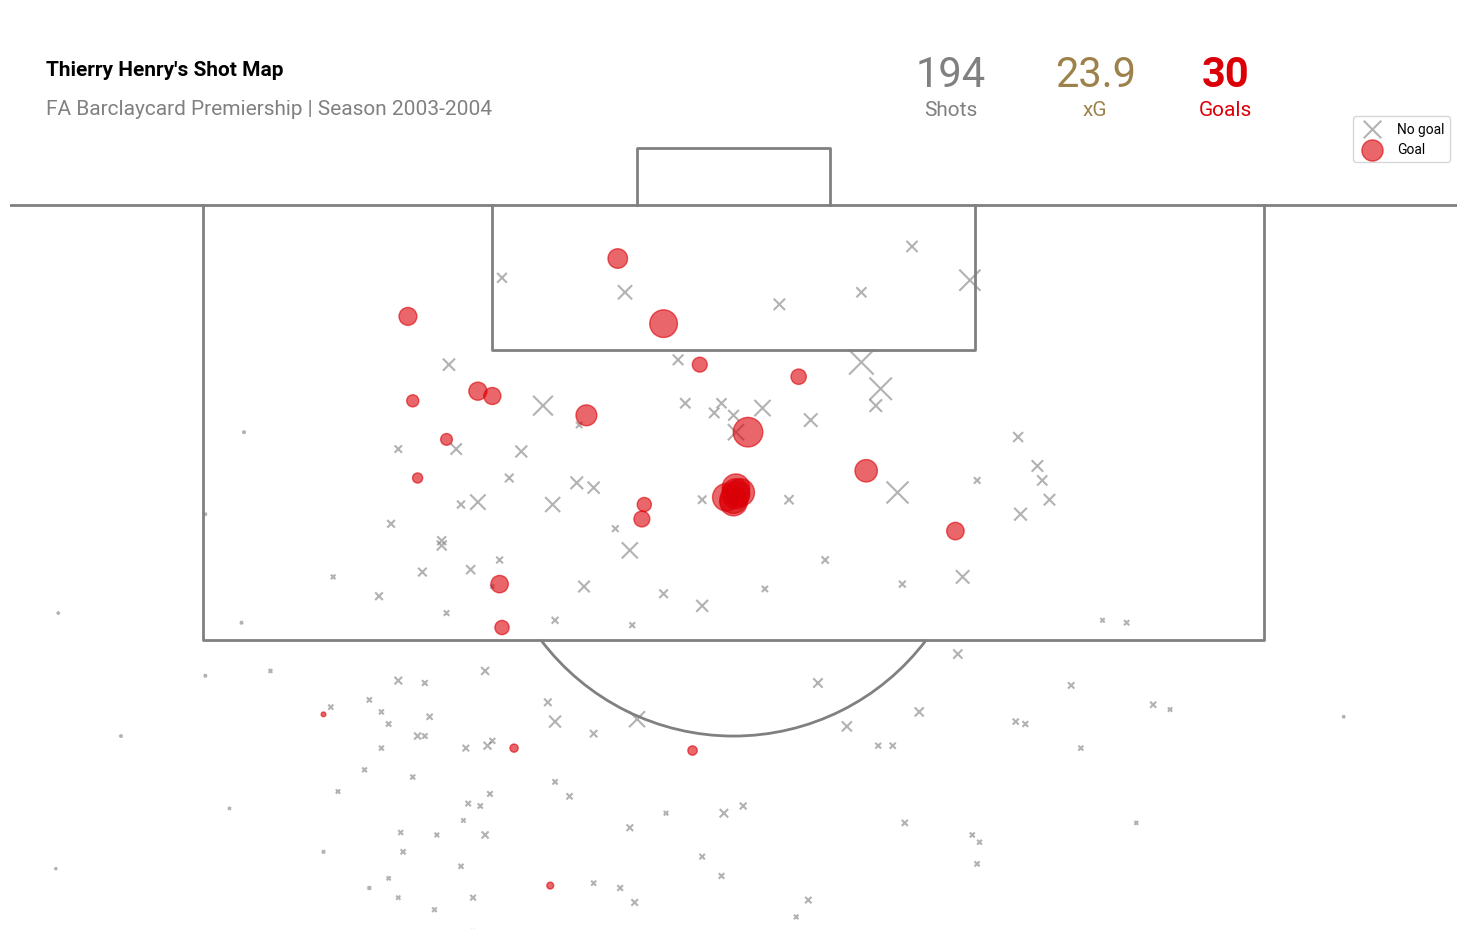

In [13]:
from mplsoccer import VerticalPitch # For soccer visualizations

# Filter shots into goals and non-goal shots
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# Set up the pitch configuration
pitch = VerticalPitch(pad_bottom=-30, pad_left=-10, pad_right=-10, half=True, goal_type='box',
                      pitch_color='white', line_color='grey')

# Create the main pitch visualization
fig, axs = pitch.grid(figheight=10, title_height=0.1, endnote_space=0, axis=False,
                      title_space=0, grid_height=0.82, endnote_height=0)

# Scatter plot for non-goal shots
sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='grey', marker='x', label="No goal", 
                    s=df_non_goal_shots.shot_statsbomb_xg * 500, alpha=0.6, ax=axs['pitch'])

# Scatter plot for goals
sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#DB0007', marker='o', label="Goal", 
                    s=df_goals.shot_statsbomb_xg * 500, alpha=0.6, ax=axs['pitch'])

# Add titles and annotations
axs['title'].text(0.025, 0.4, "Thierry Henry's Shot Map", weight='bold', fontfamily='Roboto', va='center', ha='left', fontsize=15)
axs['title'].text(0.025, 0.1, "FA Barclaycard Premiership | Season 2003-2004", color=pitch.line_color, va='top', ha='left', fontsize=15)
axs['title'].text(0.65, -0.01, "Shots", color=pitch.line_color, va='center', ha='center', fontsize=15)
axs['title'].text(0.75, -0.01, "xG", color='#9C824A', va='center', ha='center', fontsize=15)
axs['title'].text(0.84, -0.01, "Goals", color='#DB0007', va='center', ha='center', fontsize=15)

# Display shot statistics
axs['title'].text(0.65, 0.55, "{}".format(df_shot.shape[0]), color=pitch.line_color, va='top', ha='center', fontfamily='Roboto', fontsize=30)
axs['title'].text(0.75, 0.55, "{:.1f}".format(df_shot['shot_statsbomb_xg'].sum()), color='#9C824A', va='top', ha='center', fontfamily='Roboto', fontsize=30)
axs['title'].text(0.84, 0.55, "{}".format(df_shot[df_shot.outcome_name == 'Goal'].shape[0]), color='#DB0007', weight='bold', fontfamily='Roboto', va='top', ha='center', fontsize=30)

# Display legend
axs['pitch'].legend(loc='best')

plt.tight_layout()
plt.show()


- Assist + Key Passes

In [14]:
# Define the columns for the shot DataFrame
shot_cols = ['period', 'minute', 'match_id', 'player_name', 'x', 'y', 'end_y', 'end_z',
             'play_pattern_name', 'sub_type_name', 'under_pressure', 'body_part_name',
             'technique_name', 'shot_first_time', 'shot_key_pass_id', 'outcome_name',
             'shot_statsbomb_xg']

# Initialize an empty list to collect shot data frames
shot_frames = []
# Iterate through each match involving Arsenal
for match_id in df_match_arsenal['match_id']:
    # Filter shots for the current match
    mask_shot = (df_matches[match_id]['event'].type_name == 'Shot')
    shots_temp = df_matches[match_id]['event'].loc[mask_shot, shot_cols]
    
    # Check if shots_temp is not empty
    if not shots_temp.empty:
        shot_frames.append(shots_temp)

# Concatenate all collected shot frames into df_shot
df_shot = pd.concat(shot_frames).reset_index(drop=True)
# Display the DataFrame with shot data
df_shot.head()


,period,minute,match_id,player_name,x,y,end_y,end_z,play_pattern_name,sub_type_name,under_pressure,body_part_name,technique_name,shot_first_time,shot_key_pass_id,outcome_name,shot_statsbomb_xg
0,1,8,3749052,Dennis Bergkamp,104.4,34.8,43.8,0.5,From Throw In,Open Play,NaN,Right Foot,Half Volley,True,8267672c-804d-4702-ac50-d501f2eb8fe2,Goal,0.193885
1,1,12,3749052,Thierry Henry,107.2,18.1,38.9,2.3,From Throw In,Open Play,NaN,Right Foot,Normal,NaN,428a30a1-5f57-4b04-ab1b-5f0a3e189d36,Saved,0.007914
2,1,12,3749052,Gilberto Aparecido da Silva,109.1,50.3,29.5,0.0,From Throw In,Open Play,NaN,Right Foot,Normal,True,ca8d6f1b-e13b-4f2e-b32f-9a492199d00b,Off T,0.125604
3,1,13,3749052,Paul Butler,113.9,47.8,46.6,6.0,From Free Kick,Open Play,1.0,Head,Normal,NaN,8bcde336-23a1-43cb-89f9-635fd6ac8c86,Off T,0.065221
4,1,20,3749052,Denis Irwin,94.2,32.9,34.7,2.4,From Free Kick,Free Kick,NaN,Right Foot,Normal,NaN,NaN,Off T,0.058380


In [15]:
# Define columns for the assist DataFrame
assist_cols = ['id', 'player_name', 'pass_height_name', 'technique_name', 'x', 'y', 'end_x', 'end_y']
df_assist = pd.DataFrame()

# Iterate through each match involving Arsenal
for match_id in df_match_arsenal['match_id']:
    # Merge shot data with assist columns from the event data
    df_temp = pd.merge(df_shot, 
                       df_matches[match_id]['event'][assist_cols]
                           .rename(columns={'player_name': 'passer_name',
                                            'technique_name': 'pass_technique',
                                            'x': 'pass_x',
                                            'y': 'pass_y',
                                            'end_x': 'pass_end_x',
                                            'end_y': 'pass_end_y'}),
                       left_on='shot_key_pass_id',
                       right_on='id')
    # current match's data to df_assist
    df_assist = pd.concat([df_assist, df_temp])

# Reset index of df_assist
df_assist = df_assist.reset_index(drop=True)
# Display the first few rows of df_assist
df_assist.head()

,period,minute,match_id,player_name,x,y,end_y,end_z,play_pattern_name,sub_type_name,under_pressure,body_part_name,technique_name,shot_first_time,shot_key_pass_id,outcome_name,shot_statsbomb_xg,id,passer_name,pass_height_name,pass_technique,pass_x,pass_y,pass_end_x,pass_end_y
0,1,8,3749052,Dennis Bergkamp,104.4,34.8,43.8,0.5,From Throw In,Open Play,NaN,Right Foot,Half Volley,True,8267672c-804d-4702-ac50-d501f2eb8fe2,Goal,0.193885,8267672c-804d-4702-ac50-d501f2eb8fe2,Ashley Cole,Low Pass,NaN,102.0,26.9,104.7,37.6
1,1,12,3749052,Thierry Henry,107.2,18.1,38.9,2.3,From Throw In,Open Play,NaN,Right Foot,Normal,NaN,428a30a1-5f57-4b04-ab1b-5f0a3e189d36,Saved,0.007914,428a30a1-5f57-4b04-ab1b-5f0a3e189d36,Ashley Cole,Ground Pass,NaN,86.1,10.4,103.3,9.4
2,1,12,3749052,Gilberto Aparecido da Silva,109.1,50.3,29.5,0.0,From Throw In,Open Play,NaN,Right Foot,Normal,True,ca8d6f1b-e13b-4f2e-b32f-9a492199d00b,Off T,0.125604,ca8d6f1b-e13b-4f2e-b32f-9a492199d00b,Laureano Bisan-Etame Mayer,Low Pass,NaN,110.7,56.5,109.4,50.6
3,1,13,3749052,Paul Butler,113.9,47.8,46.6,6.0,From Free Kick,Open Play,1.0,Head,Normal,NaN,8bcde336-23a1-43cb-89f9-635fd6ac8c86,Off T,0.065221,8bcde336-23a1-43cb-89f9-635fd6ac8c86,Mark Kennedy,High Pass,NaN,81.4,18.0,113.6,45.9
4,1,21,3749052,Sulzeer Jeremiah ''Sol' Campbell,109.1,39.3,33.4,0.4,From Corner,Open Play,1.0,Head,Normal,NaN,f7a303cc-6edf-4047-904f-d61a8c495eca,Off T,0.043912,f7a303cc-6edf-4047-904f-d61a8c495eca,Robert Pirès,High Pass,Outswinging,120.0,80.0,109.3,40.4


In [16]:
# Filter rows where 'passer_name' contains 'Thierry Henry' and 'outcome_name' is 'Goal'
filtered_assists = df_assist.loc[(df_assist['passer_name'].str.contains('Thierry Henry')) & (df_assist['outcome_name']=='Goal')]
# Get the shape of the filtered DataFrame, which represents the number of goals assisted by Thierry Henry
assist_count = filtered_assists.shape

# Print or use assist_count as needed
print("Number of goals assisted by Thierry Henry:", assist_count)


Number of goals assisted by Thierry Henry: (6, 25)


In [17]:
# Define opponent and home/away functions
def find_opponent(row):
    match_id = row['match_id']
    home_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'home_team_name'].values[0]
    away_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'away_team_name'].values[0]
    if home_team == 'Arsenal':
        return away_team
    else:
        return home_team

def find_home_away(row):
    match_id = row['match_id']
    home_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'home_team_name'].values[0]
    away_team = df_match_arsenal.loc[df_match_arsenal['match_id'] == match_id, 'away_team_name'].values[0]
    if home_team == 'Arsenal':
        return 'home'
    else:
        return 'away'

# Apply opponent and home/away functions to df_assist DataFrame
df_assist['opponent'] = df_assist.apply(find_opponent, axis=1)
df_assist['home_away'] = df_assist.apply(find_home_away, axis=1)
# Merge with df_match_arsenal to include match date and week
df_assist = pd.merge(df_assist, df_match_arsenal[['match_id', 'match_date', 'match_week']], on='match_id')

# Filter and sort the DataFrame for assists by Thierry Henry resulting in a goal, sorted by match week
thierry_assists_goals = df_assist.loc[(df_assist['passer_name'].str.contains('Thierry Henry')) & (df_assist['outcome_name'] == 'Goal')]\
                                .sort_values('match_week')
# Display the sorted DataFrame
thierry_assists_goals.head()

,period,minute,match_id,player_name,x,y,end_y,end_z,play_pattern_name,sub_type_name,under_pressure,body_part_name,technique_name,shot_first_time,shot_key_pass_id,outcome_name,shot_statsbomb_xg,id,passer_name,pass_height_name,pass_technique,pass_x,pass_y,pass_end_x,pass_end_y,opponent,home_away,match_date,match_week
107,1,21,3749358,Sylvain Wiltord,112.0,37.5,43.6,0.6,From Counter,Open Play,NaN,Right Foot,Volley,True,ada3e39f-e656-46a5-b841-6155c2a3e3ed,Goal,0.342570,ada3e39f-e656-46a5-b841-6155c2a3e3ed,Thierry Henry,Low Pass,NaN,110.9,24.5,112.1,39.0,Middlesbrough,away,2003-08-24,1
331,1,34,3749310,Robert Pirès,107.5,29.3,40.2,0.0,From Throw In,Open Play,NaN,Left Foot,Normal,True,f0cb7bf4-8eab-4ffd-87da-ab384e52e552,Goal,0.158553,f0cb7bf4-8eab-4ffd-87da-ab384e52e552,Thierry Henry,Ground Pass,Through Ball,79.1,46.1,107.1,28.4,Southampton,away,2003-12-29,1
358,1,3,3749434,Fredrik Ljungberg,109.3,41.2,36.5,0.2,Regular Play,Open Play,NaN,Right Foot,Normal,True,522754a0-ea86-4b76-8d1e-66b0652b9feb,Goal,0.546237,522754a0-ea86-4b76-8d1e-66b0652b9feb,Thierry Henry,Ground Pass,Through Ball,90.4,48.5,107.9,43.1,Birmingham City,away,2003-11-22,1
368,2,79,3749434,Dennis Bergkamp,104.1,44.3,40.2,0.5,From Counter,Open Play,NaN,Right Foot,Lob,NaN,82fdcede-4791-41a9-9cd7-bfa2191a8538,Goal,0.553915,82fdcede-4791-41a9-9cd7-bfa2191a8538,Thierry Henry,Ground Pass,Through Ball,47.3,39.7,86.2,47.4,Birmingham City,away,2003-11-22,1
370,2,87,3749434,Robert Pirès,112.6,35.7,43.7,0.2,Regular Play,Open Play,1.0,Right Foot,Normal,NaN,8dcf158a-c021-414f-88a7-8464a208f0f3,Goal,0.490944,8dcf158a-c021-414f-88a7-8464a208f0f3,Thierry Henry,Ground Pass,NaN,103.4,16.9,102.6,26.0,Birmingham City,away,2003-11-22,1


In [18]:
# Create a mask for passes made by Thierry Henry
mask_henry = df_assist['passer_name'].str.contains('Thierry Henry')

# Group by player_name and aggregate key passes
df_bar_kp = df_assist.loc[mask_henry].groupby('player_name', as_index=False)[['period', 'match_id']].agg({'period': 'count'}).rename(columns={'period': 'key_passes'})

# Group by player_name and aggregate assists
df_bar_kp_2 = df_assist.loc[mask_henry & (df_assist['outcome_name'] == 'Goal')].groupby('player_name', as_index=False)['period'].count().rename(columns={'period': 'assists'})

# Merge the key passes and assists dataframes
df_bar_kp_2 = pd.merge(df_bar_kp, df_bar_kp_2, how='left').fillna(0)

# Convert assists column to integer
df_bar_kp_2['assists'] = df_bar_kp_2['assists'].astype(int)

# Sort the dataframe by assists and key passes in descending order
df_bar_kp_2 = df_bar_kp_2.sort_values(['assists', 'key_passes'], ascending=False).reset_index(drop=True)

# Display the result
df_bar_kp_2

,player_name,key_passes,assists
0,Dennis Bergkamp,15,2
1,Robert Pirès,13,2
2,Fredrik Ljungberg,10,1
3,Sylvain Wiltord,3,1
4,Gilberto Aparecido da Silva,6,0
5,José Antonio Reyes Calderón,6,0
6,Patrick Vieira,4,0
7,Ray Parlour,4,0
8,Ashley Cole,3,0
9,Laureano Bisan-Etame Mayer,3,0


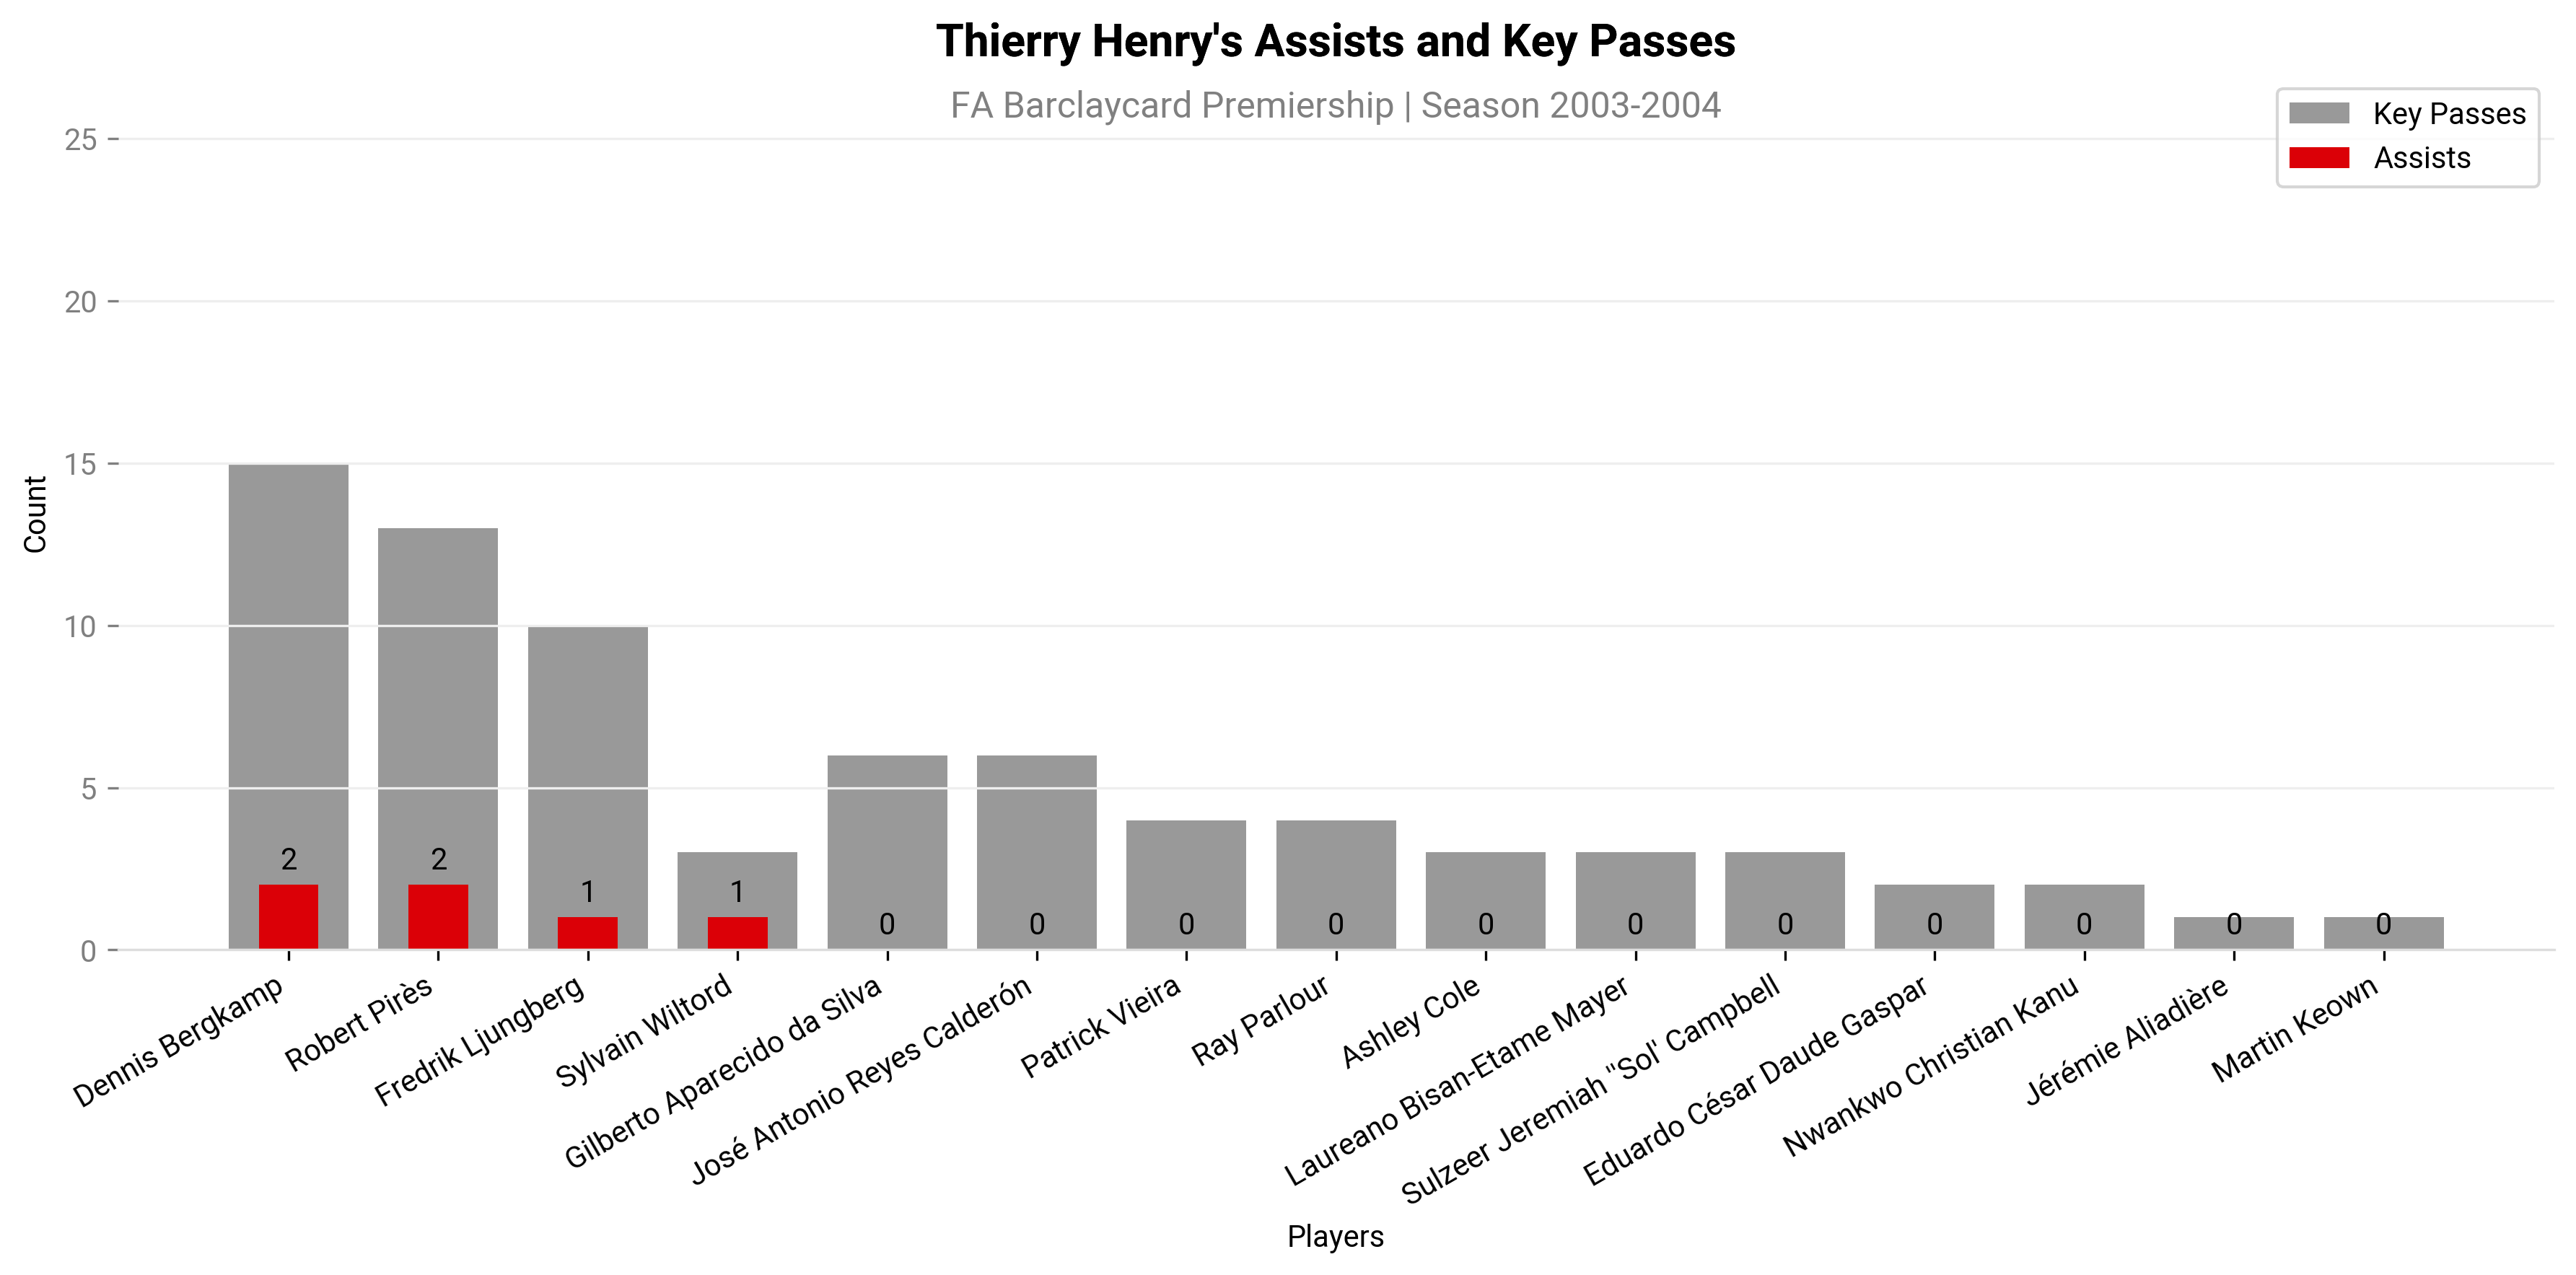

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Create the stacked bar chart for goals and assists
bar1 = ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['key_passes'], label='Key Passes', color='gray', align='center', alpha=0.8)
bar2 = ax1.bar(df_bar_kp_2['player_name'], df_bar_kp_2['assists'], label='Assists', color='#DB0007', align='center', width=0.4)

# Annotate each bar with their respective assist count
for bar, assist_count in zip(bar2, df_bar_kp_2['assists']):
    ax1.annotate(f'{assist_count}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title for the bar chart
ax1.set_xlabel('Players')
ax1.set_ylabel('Count')
ax1.set_title("Thierry Henry's Assists and Key Passes", weight='bold', fontsize=15)

# Add the subtitle below the main title
ax1.text(0.5, 1.02, "Thierry Henry's Assists and Key Passes", weight='bold', fontsize=15,
         transform=ax1.transAxes, horizontalalignment='center')
ax1.text(0.5, 0.95, "FA Barclaycard Premiership | Season 2003-2004", color='gray', fontsize=12,
         transform=ax1.transAxes, horizontalalignment='center')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(df_bar_kp_2['player_name'], rotation=30, ha='right')

# Add legend
ax1.legend(loc='upper right')

# Set y-axis limits and adjust tick parameters
ax1.set_ylim(0, 27)
ax1.tick_params(axis='y', colors='gray')

# Customize grid and spines
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


- Heatmap

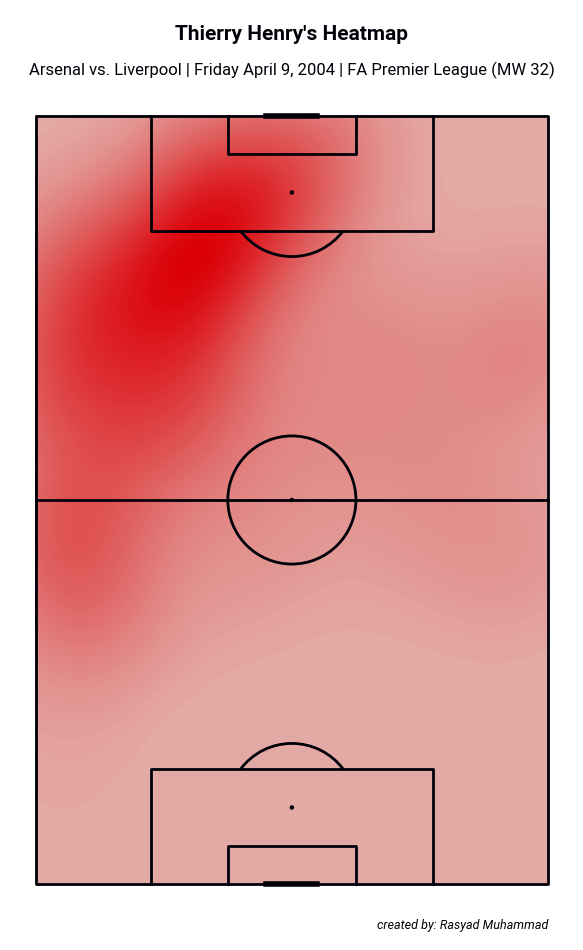

In [20]:
from matplotlib.colors import LinearSegmentedColormap  # For custom colormaps
from mplsoccer import VerticalPitch # For soccer visualizations

# Load data for Thierry Henry's actions (assuming you have the data loading code)
parser = Sbopen()
df_henry = parser.event(3749448)[0]  # 0 index is the event file
df_henry = df_henry.loc[df_henry.player_id == 15516, ['x', 'y']]

# Define custom colormap
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 100 colors", ['#e3aca7', '#DB0007'], N=100)

# Set up the pitch
pitch = VerticalPitch(line_color='#000009', line_zorder=2)

# Create figure and axis for combined visualization
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, title_space=0,
                      axis=False,  # Turn off endnote/title axis after layout
                      grid_height=0.82, endnote_height=0.03)

# Plot KDE heatmap on the grid axis
kde = pitch.kdeplot(df_henry.x, df_henry.y, ax=axs['pitch'],
                    fill=True, levels=100,  # Smooth filled levels
                    thresh=0, cut=4,        # Extend cut to bottom edge
                    cmap=flamingo_cmap)

# Add endnote text
axs['endnote'].text(1, 0.5, 'created by: Rasyad Muhammad', va='center', ha='right', fontsize=9,
                    fontproperties=font_manager.FontProperties(fname=font_filename))

# Add title text
axs['title'].text(0.5, 0.7, "Thierry Henry's Heatmap", color='#000009',
                  va='center', ha='center', weight='bold', fontsize=15)
axs['title'].text(0.5, 0.25, "Arsenal vs. Liverpool | Friday April 9, 2004 | FA Premier League (MW 32)", weight='regular', color='#000009',
                  va='center', ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()